In [3]:
pip install finterstellar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
import finterstellar as fs

In [7]:
otp = '16620193411099710310'
df = fs.fn_single(otp=otp, symbol='NFLX', window='T')

In [8]:
df['Revenue Growth'] = ( df['Revenue'] - df['Revenue'].shift(12) ) / abs(df['Revenue'].shift(12))

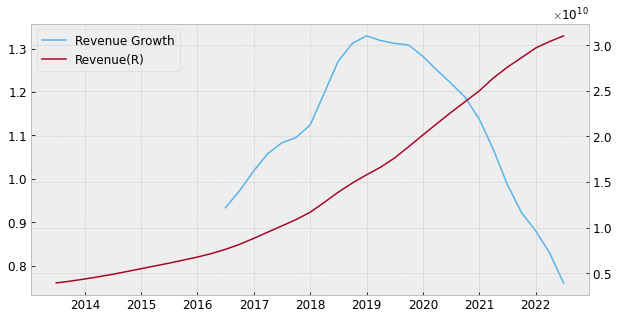

In [9]:
fs.draw_chart(df, left='Revenue Growth', right='Revenue')

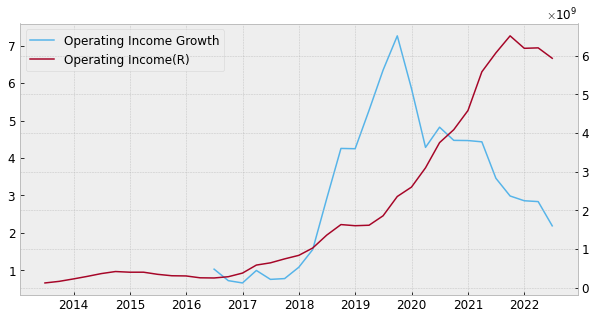

In [10]:
df['Operating Income Growth'] = ( df['Operating Income'] - df['Operating Income'].shift(12) ) / abs(df['Operating Income'].shift(12))
fs.draw_chart(df, left='Operating Income Growth', right='Operating Income')

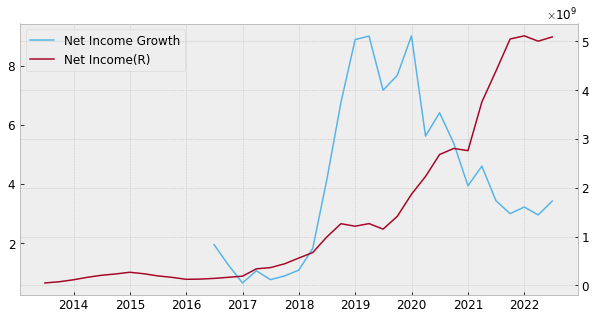

In [11]:
df['Net Income Growth'] = ( df['Net Income'] - df['Net Income'].shift(12) ) / abs(df['Net Income'].shift(12))
fs.draw_chart(df, left='Net Income Growth', right='Net Income')

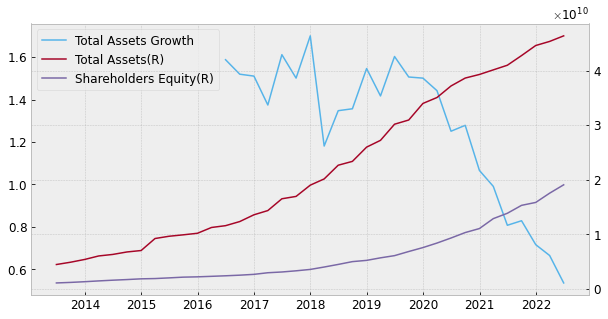

In [12]:
df['Total Assets Growth'] = ( df['Total Assets'] - df['Total Assets'].shift(12) ) / abs(df['Total Assets'].shift(12))
fs.draw_chart(df, left='Total Assets Growth', right=['Total Assets', 'Shareholders Equity'])

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 19.25%
Accumulated return: 243.25%
Investment period: 7.0yrs
Sharpe ratio: 0.98
MDD: -29.95%


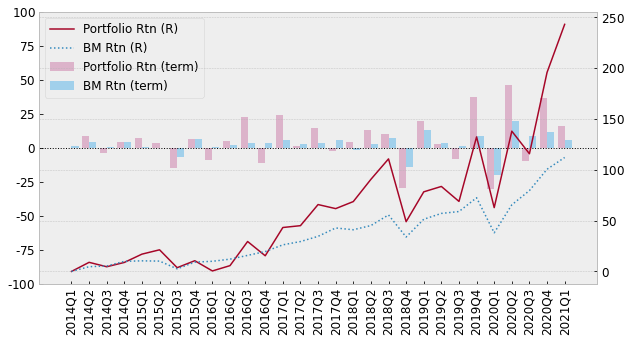

In [14]:
# Revenue Growth
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)
s = {}
signal = {}
y = 3
for t in terms:
    if list(terms).index(t) >= y*4:
        prev_t = fs.quarters_before(terms, t, y*4)
        data[t]['Revenue Growth'] = ( data[t]['Revenue'] - data[prev_t]['Revenue'] ) / abs(data[prev_t]['Revenue'])
        s[t] = fs.fn_filter(data[t], by='Revenue Growth', floor=0, n=30, asc=False)
        signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 7.24%
Accumulated return: 63.17%
Investment period: 7.0yrs
Sharpe ratio: 0.32
MDD: -47.24%


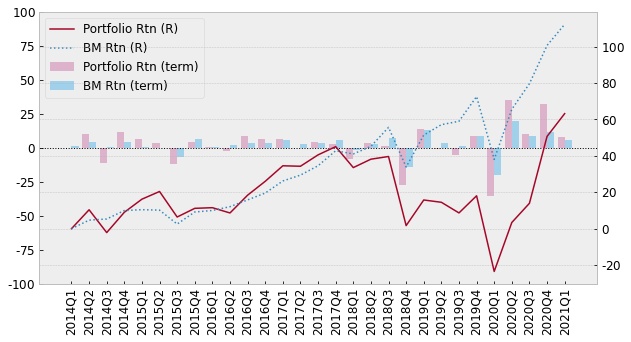

In [16]:
# Operating Income Growth
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
y = 3
for t in terms:
    if list(terms).index(t) >= y*4:
        prev_t = fs.quarters_before(terms, t, y*4)
        data[t]['Operating Income Growth'] = ( data[t]['Operating Income'] - data[prev_t]['Operating Income'] ) / abs(data[prev_t]['Operating Income'])
        s[t] = fs.fn_filter(data[t], by='Operating Income Growth', floor=0, n=30, asc=False)
        signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 4.23%
Accumulated return: 33.68%
Investment period: 7.0yrs
Sharpe ratio: 0.22
MDD: -32.94%


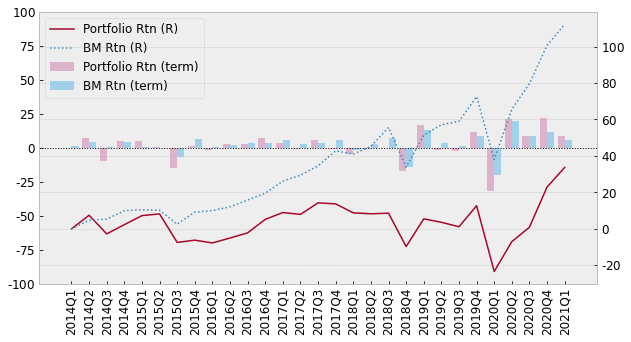

In [17]:
# Net Income Growth
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
y = 3
for t in terms:
    if list(terms).index(t) >= y*4:
        prev_t = fs.quarters_before(terms, t, y*4)
        data[t]['Net Income Growth'] = ( data[t]['Net Income'] - data[prev_t]['Net Income'] ) / abs(data[prev_t]['Net Income'])
        s[t] = fs.fn_filter(data[t], by='Net Income Growth', floor=0, n=30, asc=False)
        signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [18]:
# PER + Net Income Growth
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s = {}
signal = {}
y = 3
for t in terms:
    if list(terms).index(t) >= y*4:
        prev_t = fs.quarters_before(terms, t, y*4)
        data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
        data[t]['Net Income Growth'] = ( data[t]['Net Income'] - data[prev_t]['Net Income'] ) / abs(data[prev_t]['Net Income'])
        s1[t] = fs.fn_score(data[t], by='PER', floor=1, cap=10, asc=True)
        s2[t] = fs.fn_score(data[t], by='Net Income Growth', floor=0, asc=False)
        s[t] = fs.combine_score(s1[t], s2[t], n=30)
        signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 4.92%
Accumulated return: 40.00%
Investment period: 7.0yrs
Sharpe ratio: 0.18
MDD: -54.10%


In [19]:
# PBR + Operating Income Growth
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s = {}
signal = {}
y = 3
for t in terms:
    if list(terms).index(t) >= y*4:
        prev_t = fs.quarters_before(terms, t, y*4)
        data[t]['PBR'] = data[t]['Price_M3'] / ( data[t]['Shareholders Equity'] / data[t]['Shares'] )
        data[t]['Operating Income Growth'] = ( data[t]['Operating Income'] - data[prev_t]['Operating Income'] ) / abs(data[prev_t]['Operating Income'])
        s1[t] = fs.fn_score(data[t], by='PBR', floor=.1, cap=1, asc=True)
        s2[t] = fs.fn_score(data[t], by='Operating Income Growth', floor=0, asc=False)
        s[t] = fs.combine_score(s1[t], s2[t], n=30)
        signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 9.53%
Accumulated return: 89.17%
Investment period: 7.0yrs
Sharpe ratio: 0.33
MDD: -54.25%
